Good to add a disclaimer that this project is not sponsored by Airbnb



-Baseline Model - Dummy Classifier
-FSM - Something
(These are due next Tuesday)

MVP
-Presentation (Outline)
-Github
-Notebook



In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 


pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("data/Airbnb_Data.csv")

df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",2016-06-18,t,t,NaN,2012-03-26,f,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,Enjoy travelling during your stay in Manhattan...,2017-08-05,t,f,100%,2017-06-19,t,2017-09-23,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,The Oasis comes complete with a full backyard ...,2017-04-30,t,t,100%,2016-10-25,t,2017-09-14,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,This light-filled home-away-from-home is super...,NaN,t,t,NaN,2015-04-19,f,NaN,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,"Cool, cozy, and comfortable studio located in ...",2015-05-12,t,t,100%,2015-03-01,t,2017-01-22,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [4]:
#At first glance, it seems as if there are no duplicates.

df['id'].value_counts()

11667455    1
1106505     1
11659752    1
20439529    1
4717034     1
           ..
6269649     1
1598886     1
9837993     1
7734698     1
13770756    1
Name: id, Length: 74111, dtype: int64

In [5]:
#Changing columns with dates as string to datetime

df['first_review'] = pd.to_datetime(df['first_review'])
df['host_since'] = pd.to_datetime(df['host_since'])
df['last_review'] = pd.to_datetime(df['last_review'])

In [6]:
print(df['first_review'].min())
print(df['first_review'].max())

2008-11-17 00:00:00
2017-10-05 00:00:00


In [7]:
print(df['host_since'].min())
print(df['host_since'].max())

2008-03-03 00:00:00
2017-10-04 00:00:00


In [8]:
print(df['last_review'].min())
print(df['last_review'].max())

2009-01-21 00:00:00
2017-10-05 00:00:00


A limitation of this dataset is that it seems a bit dated through end of 2017. It seems like the last date in the dataset is 2017-10-05. Using this value, we calculate the length of being a host.

In [9]:
last_date = df['last_review'].max()

In [10]:
#We have created a host experiences (in years) column

df['host_experience'] = [(last_date - date).days/365 for date in df['host_since']]

In [11]:
#We have the log_price but also good to create a price_per_night column

df['price_per_night'] = [np.exp(x) for x in df['log_price']]

In [12]:
#We need to combine the strict categories into one

df['cancellation_policy'].value_counts()

strict             32374
flexible           22545
moderate           19063
super_strict_30      112
super_strict_60       17
Name: cancellation_policy, dtype: int64

In [13]:
#We have reclassified the super strict categories into just strict

df['cancellation_policy'] = df['cancellation_policy'].str.replace('super_strict_30', 'strict')
df['cancellation_policy'] = df['cancellation_policy'].str.replace('super_strict_60', 'strict')

In [14]:
df['cancellation_policy'].value_counts()

strict      32503
flexible    22545
moderate    19063
Name: cancellation_policy, dtype: int64

In [15]:
#We see some entries with null values for bedrooms and bathrooms

df[df['bedrooms'].isna()][['bedrooms', 'bathrooms']].head(20)

,bedrooms,bathrooms
200,NaN,1.0
301,NaN,1.0
2368,NaN,NaN
2842,NaN,NaN
3331,NaN,1.0
6647,NaN,1.0
7155,NaN,1.0
8807,NaN,1.0
10513,NaN,1.0
11584,NaN,1.0


In [16]:
#We will resort to dropping the null values in the bedrooms and bathrooms columns.
#We start with bathrooms because the column has more null values.

df.dropna(subset=['bathrooms'], inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73911 entries, 0 to 74110
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      73911 non-null  int64         
 1   log_price               73911 non-null  float64       
 2   property_type           73911 non-null  object        
 3   room_type               73911 non-null  object        
 4   amenities               73911 non-null  object        
 5   accommodates            73911 non-null  int64         
 6   bathrooms               73911 non-null  float64       
 7   bed_type                73911 non-null  object        
 8   cancellation_policy     73911 non-null  object        
 9   cleaning_fee            73911 non-null  bool          
 10  city                    73911 non-null  object        
 11  description             73911 non-null  object        
 12  first_review            58087 non-null  dateti

In [18]:
#Removing null values in the bathrooms category helped but there are still about 86 null values in the bedrooms column.
#We will also remove the null values in bedrooms

df.dropna(subset=['bedrooms'], inplace=True)

In [19]:
df['bedrooms_and_bathrooms'] = df['bedrooms'] + df['bathrooms']

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73825 entries, 0 to 74110
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      73825 non-null  int64         
 1   log_price               73825 non-null  float64       
 2   property_type           73825 non-null  object        
 3   room_type               73825 non-null  object        
 4   amenities               73825 non-null  object        
 5   accommodates            73825 non-null  int64         
 6   bathrooms               73825 non-null  float64       
 7   bed_type                73825 non-null  object        
 8   cancellation_policy     73825 non-null  object        
 9   cleaning_fee            73825 non-null  bool          
 10  city                    73825 non-null  object        
 11  description             73825 non-null  object        
 12  first_review            58019 non-null  dateti

In [21]:
df['city'].value_counts()

NYC        32205
LA         22360
SF          6413
DC          5672
Chicago     3716
Boston      3459
Name: city, dtype: int64

In [22]:
#We will be working with the Airbnb listings of that are only in NYC

df_nyc = df[df['city'] == 'NYC'].reset_index(drop=True)

In [23]:
df_nyc.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,host_experience,price_per_night,bedrooms_and_bathrooms
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",2016-06-18,t,t,NaN,2012-03-26,f,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0,5.531507,150.0,2.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,Enjoy travelling during your stay in Manhattan...,2017-08-05,t,f,100%,2017-06-19,t,2017-09-23,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0,0.295890,169.0,4.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,The Oasis comes complete with a full backyard ...,2017-04-30,t,t,100%,2016-10-25,t,2017-09-14,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0,0.945205,145.0,2.0
3,5578513,4.605170,Apartment,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.0,Real Bed,strict,True,NYC,This is a bright bedroom in an historic buildi...,2013-04-28,t,t,100%,2013-03-27,f,2016-11-15,40.723883,-73.983880,Large East Village Bedroom To Let!,Alphabet City,82,93.0,https://a0.muscache.com/im/pictures/21726900/1...,10009.0,1.0,1.0,4.528767,100.0,2.0
4,17589436,4.882802,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",2,1.0,Real Bed,strict,True,NYC,"I am renting a very spacious, unique, bright L...",2015-09-26,t,t,71%,2015-08-17,f,2016-12-12,40.719086,-73.990285,"Amazing LES apt - cool, bright...",Lower East Side,26,86.0,NaN,10002,1.0,2.0,2.136986,132.0,2.0


In [24]:
df_nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32205 entries, 0 to 32204
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      32205 non-null  int64         
 1   log_price               32205 non-null  float64       
 2   property_type           32205 non-null  object        
 3   room_type               32205 non-null  object        
 4   amenities               32205 non-null  object        
 5   accommodates            32205 non-null  int64         
 6   bathrooms               32205 non-null  float64       
 7   bed_type                32205 non-null  object        
 8   cancellation_policy     32205 non-null  object        
 9   cleaning_fee            32205 non-null  bool          
 10  city                    32205 non-null  object        
 11  description             32205 non-null  object        
 12  first_review            25367 non-null  dateti

In [25]:
df_nyc['review_scores_rating'].value_counts()

100.0    7093
93.0     1721
96.0     1672
95.0     1555
97.0     1529
98.0     1485
90.0     1451
94.0     1194
80.0     1151
92.0      988
99.0      752
91.0      745
89.0      548
87.0      533
88.0      507
85.0      292
86.0      275
60.0      246
84.0      212
83.0      189
82.0      100
70.0       91
73.0       75
81.0       61
40.0       53
75.0       50
20.0       42
78.0       42
79.0       42
77.0       39
76.0       38
67.0       29
74.0       22
72.0       13
65.0       12
50.0       12
68.0       10
69.0        7
71.0        6
64.0        5
53.0        3
57.0        3
63.0        2
47.0        2
66.0        2
62.0        2
55.0        2
56.0        1
27.0        1
Name: review_scores_rating, dtype: int64

In [26]:
#observing null score ratings

df_nyc_nullscores = df_nyc[df_nyc['review_scores_rating'].isnull() == True][['host_since','number_of_reviews', 'last_review', 'review_scores_rating']]

In [27]:
#The vast majority of null scores have 0 or 1 reviews

df_nyc_nullscores['number_of_reviews'].value_counts()

0      6804
1       399
2        48
3        17
4         8
15        3
5         3
23        2
8         2
21        1
28        1
36        1
17        1
63        1
33        1
37        1
47        1
6         1
18        1
7         1
19        1
43        1
101       1
Name: number_of_reviews, dtype: int64

In [28]:
#It's important to understand though that there are listing with no review scores that had more than one review.

df_nyc_nullscores[df_nyc_nullscores['number_of_reviews'] > 1]

,host_since,number_of_reviews,last_review,review_scores_rating
597,2014-03-15,6,2017-01-01,NaN
1064,2013-04-22,2,2016-06-17,NaN
1351,2015-02-25,3,2016-03-15,NaN
1434,2011-05-24,2,2017-07-19,NaN
1482,2013-03-17,15,2017-09-13,NaN
...,...,...,...,...
31543,NaT,15,2017-09-03,NaN
31638,2015-01-22,37,2017-09-30,NaN
31759,2014-08-10,2,2017-08-12,NaN
31863,2014-11-18,23,2016-06-26,NaN


It is difficult to tell why there are no review scores associated with listings with more than 1 review. However, these listings could be associated with suspended listings. 

"Airbnb has a strict policy on banning hosts who violate their community standards or terms of service. The company reserves the right to remove a host's listing and suspend or terminate their account if they engage in behavior that is deemed inappropriate, including but not limited to discrimination, harassment, fraudulent activity, or unsafe or illegal conduct."

Given the lack of information about the reviews/ratings for newer listings and potential suspended listings, we remove them from the dataset??????????


Or do we keep them in the dataset and assign a value ?????????

We'll come back to this

For those with no review - we will assign them the mean score
For those with more than 1 review but no review score - we will assume that the host lost credibility


In [29]:
# Calculate the mean rating
mean_rating = df_nyc['review_scores_rating'].mean()

# Create a boolean mask to identify rows with null values and number_of_reviews <= 1
mask = (df_nyc['review_scores_rating'].isnull()) & (df_nyc['number_of_reviews'] <= 1)

# Replace null values that meet the conditions with the mean rating
df_nyc.loc[mask, 'review_scores_rating'] = mean_rating

# Replace other null values with 0
df_nyc['review_scores_rating'].fillna(0, inplace=True)

In [30]:
df_nyc['review_scores_rating'].value_counts()

93.512869     7203
100.000000    7093
93.000000     1721
96.000000     1672
95.000000     1555
97.000000     1529
98.000000     1485
90.000000     1451
94.000000     1194
80.000000     1151
92.000000      988
99.000000      752
91.000000      745
89.000000      548
87.000000      533
88.000000      507
85.000000      292
86.000000      275
60.000000      246
84.000000      212
83.000000      189
82.000000      100
0.000000        97
70.000000       91
73.000000       75
81.000000       61
40.000000       53
75.000000       50
79.000000       42
78.000000       42
20.000000       42
77.000000       39
76.000000       38
67.000000       29
74.000000       22
72.000000       13
65.000000       12
50.000000       12
68.000000       10
69.000000        7
71.000000        6
64.000000        5
53.000000        3
57.000000        3
63.000000        2
66.000000        2
47.000000        2
62.000000        2
55.000000        2
56.000000        1
27.000000        1
Name: review_scores_rating, dty

In [31]:
#The amenities column needs a lot of cleaning up.

df_nyc['amenities'][0]

'{"Wireless Internet","Air conditioning",Kitchen,Heating,"Family/kid friendly",Essentials,"Hair dryer",Iron,"translation missing: en.hosting_amenity_50"}'

In [32]:
#Cleaning up column to remove {} and ""

df_nyc['amenities'] = df_nyc['amenities'].str.replace('{', '').str.replace('}', '').str.replace('"', '')

In [33]:
df_nyc['amenities'][0]

'Wireless Internet,Air conditioning,Kitchen,Heating,Family/kid friendly,Essentials,Hair dryer,Iron,translation missing: en.hosting_amenity_50'

In [34]:
#First we will look at how many unique amenities exist

# Step 1: Extract the 'amenities' column
amenities_column = df_nyc['amenities']

# Step 2: Create an empty set
unique_amenities = set()

# Step 3: Iterate over each row
for row in amenities_column:
    # Step 4: Split the string value by commas
    amenities_list = row.split(',')

    # Step 5: Iterate over each amenity
    for amenity in amenities_list:
        # Step 6: Remove leading and trailing spaces
        cleaned_amenity = amenity.strip()

        # Step 7: Add the cleaned amenity to the set
        unique_amenities.add(cleaned_amenity)

# Step 8: Print the unique amenities
print(unique_amenities)

{'', 'Private living room', 'Flat', 'Carbon monoxide detector', 'Dishes and silverware', 'Laptop friendly workspace', 'Firm mattress', 'Fixed grab bars for shower & toilet', 'Well-lit path to entrance', 'Hangers', 'Step-free access', 'Elevator', 'Pocket wifi', 'Baby bath', 'Keypad', 'Ski in/Ski out', 'Private entrance', 'Changing table', 'Pool', 'Cat(s)', 'Gym', 'Lockbox', 'Breakfast', 'Wide clearance to bed', 'Wide hallway clearance', 'Suitable for events', 'Dog(s)', 'Wheelchair accessible', 'Handheld shower head', 'Wireless Internet', 'Free parking on street', 'Bathtub', 'Oven', 'Pets live on this property', 'Indoor fireplace', 'Garden or backyard', 'Accessible-height bed', 'Extra pillows and blankets', 'Fire extinguisher', 'Disabled parking spot', 'Free parking on premises', 'First aid kit', 'Hot water', 'Outlet covers', 'Accessible-height toilet', 'Stair gates', 'Patio or balcony', 'Self Check-In', 'Essentials', 'Lock on bedroom door', 'Table corner guards', 'Luggage dropoff allowe

In [35]:
#Have identified 118 unique amenities but the output needs some cleaning

len(unique_amenities)

117

In [36]:
#We are cleaning up the Unique Amenities
unique_amenities.remove('')
unique_amenities.remove('translation missing: en.hosting_amenity_49')
unique_amenities.remove('translation missing: en.hosting_amenity_50')

In [37]:
len(unique_amenities)

114

In [38]:
unique_amenities_list = sorted(unique_amenities)

In [39]:
unique_amenities_list

['24-hour check-in',
 'Accessible-height bed',
 'Accessible-height toilet',
 'Air conditioning',
 'Air purifier',
 'BBQ grill',
 'Baby bath',
 'Baby monitor',
 'Babysitter recommendations',
 'Bathtub',
 'Bathtub with shower chair',
 'Beach essentials',
 'Beachfront',
 'Bed linens',
 'Breakfast',
 'Buzzer/wireless intercom',
 'Cable TV',
 'Carbon monoxide detector',
 'Cat(s)',
 'Changing table',
 'Children’s books and toys',
 'Children’s dinnerware',
 'Cleaning before checkout',
 'Coffee maker',
 'Cooking basics',
 'Crib',
 'Disabled parking spot',
 'Dishes and silverware',
 'Dishwasher',
 'Dog(s)',
 'Doorman',
 'Dryer',
 'EV charger',
 'Elevator',
 'Essentials',
 'Ethernet connection',
 'Extra pillows and blankets',
 'Family/kid friendly',
 'Fire extinguisher',
 'Fireplace guards',
 'Firm mattress',
 'First aid kit',
 'Fixed grab bars for shower & toilet',
 'Flat',
 'Free parking on premises',
 'Free parking on street',
 'Game console',
 'Garden or backyard',
 'Ground floor access',
 '

In [40]:
#Now we create an amenities_count column to figure out how many amenities exist for each listing
df_nyc['amenities_count'] = 0
row_count = 0

for row in df_nyc['amenities']:
    amenities_list = row.split(',')
    cleaned_list = []
    count = 0

    for amenity in amenities_list:
        cleaned_amenity = amenity.strip()
        cleaned_list.append(cleaned_amenity)

    for amenity in cleaned_list:
        if amenity in unique_amenities_list:
            count += 1

    df_nyc.loc[row_count, 'amenities_count'] = count
    row_count += 1

In [41]:
#Checking if the amenities_count was done correctly

df_nyc[['amenities','amenities_count']].head()

,amenities,amenities_count
0,"Wireless Internet,Air conditioning,Kitchen,Hea...",8
1,"Wireless Internet,Air conditioning,Kitchen,Hea...",14
2,"TV,Cable TV,Wireless Internet,Air conditioning...",18
3,"Internet,Wireless Internet,Air conditioning,Ki...",14
4,"TV,Cable TV,Internet,Wireless Internet,Air con...",18


In [42]:
#We have eight unique amenities excluding the last value that doesn't tell us anything. The count is working correctly.

df_nyc['amenities'][0]

'Wireless Internet,Air conditioning,Kitchen,Heating,Family/kid friendly,Essentials,Hair dryer,Iron,translation missing: en.hosting_amenity_50'

In [43]:
#

df_nyc['amenities_count'].value_counts().head(20)

13    2303
14    2294
12    2198
15    2182
16    2089
11    1898
17    1847
10    1792
18    1673
19    1487
9     1433
20    1299
8     1153
21    1030
22     892
7      882
23     728
6      548
24     547
25     409
Name: amenities_count, dtype: int64

-Explored but might not be necessary....

We need to narrow down the unique amenities to figure out which ones are amenities that guests want

-https://www.airbnb.com/resources/hosting-homes/a/the-amenities-guests-want-25
-https://www.superhog.com/blog/must-have-airbnb-amenities/

Airbnb commissioned a survey of 8,629 individuals across the US, Canada, Australia, China, Mexico, Brazil, India, Germany, Spain, Argentina and Italy ages 18 and over via Pollfish in July 2018 to better understand what amenities modern travelers crave most and how they differ by location and age
-https://news.airbnb.com/amenities-do-matter-airbnb-reveals-which-amenities-guests-search-for-most/

Total Amenities (Count)
Desired Amenities

In [44]:
df_nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32205 entries, 0 to 32204
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      32205 non-null  int64         
 1   log_price               32205 non-null  float64       
 2   property_type           32205 non-null  object        
 3   room_type               32205 non-null  object        
 4   amenities               32205 non-null  object        
 5   accommodates            32205 non-null  int64         
 6   bathrooms               32205 non-null  float64       
 7   bed_type                32205 non-null  object        
 8   cancellation_policy     32205 non-null  object        
 9   cleaning_fee            32205 non-null  bool          
 10  city                    32205 non-null  object        
 11  description             32205 non-null  object        
 12  first_review            25367 non-null  dateti

We will now work on developing a host reliability score. We will use the following columns to construct such column:
- host_has_profile_pic
- host_identity_verified
- host_response_rate
- host_experience

The host reliability score will be created using an equal weighting of each column to come up with a score.
- 25% x host_has_profile_pic + 25% x host_identity_verified + 25% x host_response_rate + 25% x host_experience_percentile

To start we will start by cleaning up the host_has_profile_pic and host_identify_verified columns, which has 't' and 'f' as values. We will convert these into 1 and 0, respectively.

In [45]:
df_nyc['host_has_profile_pic'] = df_nyc['host_has_profile_pic'].replace({'t': 1, 'f': 0})
df_nyc['host_identity_verified'] = df_nyc['host_identity_verified'].replace({'t': 1, 'f': 0})

In [46]:
df_nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32205 entries, 0 to 32204
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      32205 non-null  int64         
 1   log_price               32205 non-null  float64       
 2   property_type           32205 non-null  object        
 3   room_type               32205 non-null  object        
 4   amenities               32205 non-null  object        
 5   accommodates            32205 non-null  int64         
 6   bathrooms               32205 non-null  float64       
 7   bed_type                32205 non-null  object        
 8   cancellation_policy     32205 non-null  object        
 9   cleaning_fee            32205 non-null  bool          
 10  city                    32205 non-null  object        
 11  description             32205 non-null  object        
 12  first_review            25367 non-null  dateti

In [47]:
#We move on to cleaning up the host_response_rate, which consists of a good amount of null values

df_nyc[df_nyc['host_response_rate'].isna()][['host_response_rate','number_of_reviews']].head(5)

#What we can see is that host_response_rate is not necessarily because the hosts are new.
#It is more likely that the null values in the host_response_rate are associated with no responses.

,host_response_rate,number_of_reviews
0,NaN,2
14,NaN,0
17,NaN,0
19,NaN,1
23,NaN,0


In [48]:
df_nyc['host_response_rate'].value_counts()

100%    17175
90%      1089
80%       576
0%        389
50%       301
        ...  
72%         1
61%         1
6%          1
21%         1
41%         1
Name: host_response_rate, Length: 74, dtype: int64

In [49]:
#For the null values, we assign 0% to hosts with null value response rates.
#However, this column is currently an object. As such, we change the column into a type float

df_nyc['host_response_rate'].fillna('0%', inplace=True)
df_nyc['host_response_rate'] = df_nyc['host_response_rate'].str.rstrip('%').astype(float) / 100

In [50]:
df_nyc.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,host_experience,price_per_night,bedrooms_and_bathrooms,amenities_count
0,6901257,5.010635,Apartment,Entire home/apt,"Wireless Internet,Air conditioning,Kitchen,Hea...",3,1.0,Real Bed,strict,True,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",2016-06-18,1.0,1.0,0.00,2012-03-26,f,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0,5.531507,150.0,2.0,8
1,6304928,5.129899,Apartment,Entire home/apt,"Wireless Internet,Air conditioning,Kitchen,Hea...",7,1.0,Real Bed,strict,True,NYC,Enjoy travelling during your stay in Manhattan...,2017-08-05,1.0,0.0,1.00,2017-06-19,t,2017-09-23,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0,0.295890,169.0,4.0,14
2,7919400,4.976734,Apartment,Entire home/apt,"TV,Cable TV,Wireless Internet,Air conditioning...",5,1.0,Real Bed,moderate,True,NYC,The Oasis comes complete with a full backyard ...,2017-04-30,1.0,1.0,1.00,2016-10-25,t,2017-09-14,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0,0.945205,145.0,2.0,18
3,5578513,4.605170,Apartment,Private room,"Internet,Wireless Internet,Air conditioning,Ki...",2,1.0,Real Bed,strict,True,NYC,This is a bright bedroom in an historic buildi...,2013-04-28,1.0,1.0,1.00,2013-03-27,f,2016-11-15,40.723883,-73.983880,Large East Village Bedroom To Let!,Alphabet City,82,93.0,https://a0.muscache.com/im/pictures/21726900/1...,10009.0,1.0,1.0,4.528767,100.0,2.0,14
4,17589436,4.882802,Apartment,Entire home/apt,"TV,Cable TV,Internet,Wireless Internet,Air con...",2,1.0,Real Bed,strict,True,NYC,"I am renting a very spacious, unique, bright L...",2015-09-26,1.0,1.0,0.71,2015-08-17,f,2016-12-12,40.719086,-73.990285,"Amazing LES apt - cool, bright...",Lower East Side,26,86.0,NaN,10002,1.0,2.0,2.136986,132.0,2.0,18


In [51]:
#Finally, we take a look at host experience. We first check for any null values

df_nyc[df_nyc['host_experience'].isna()][['id','number_of_reviews','host_experience']]

,id,number_of_reviews,host_experience
35,262343,0,NaN
47,4588783,7,NaN
83,18058045,6,NaN
235,20973084,0,NaN
249,15629616,7,NaN
...,...,...,...
31665,18309217,4,NaN
31969,15511180,2,NaN
31992,13489420,39,NaN
32116,6822854,7,NaN


In [52]:
#We see that these values are not available and it is not because the hosts are new.
#Given that it is only 176 rows, we will resort to dropping

df_nyc.dropna(subset=['host_experience'], inplace=True)

In [53]:
df_nyc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32030 entries, 0 to 32204
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      32030 non-null  int64         
 1   log_price               32030 non-null  float64       
 2   property_type           32030 non-null  object        
 3   room_type               32030 non-null  object        
 4   amenities               32030 non-null  object        
 5   accommodates            32030 non-null  int64         
 6   bathrooms               32030 non-null  float64       
 7   bed_type                32030 non-null  object        
 8   cancellation_policy     32030 non-null  object        
 9   cleaning_fee            32030 non-null  bool          
 10  city                    32030 non-null  object        
 11  description             32030 non-null  object        
 12  first_review            25231 non-null  dateti

In [54]:
#We now create a new column host_experience_percentile, which is the percentile ranking of the host experience
df_nyc['host_experience_percentile'] = stats.rankdata(df_nyc['host_experience'], method='average') / len(df_nyc)


In [55]:
df_nyc.head(20)

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,host_experience,price_per_night,bedrooms_and_bathrooms,amenities_count,host_experience_percentile
0,6901257,5.010635,Apartment,Entire home/apt,"Wireless Internet,Air conditioning,Kitchen,Hea...",3,1.0,Real Bed,strict,True,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",2016-06-18,1.0,1.0,0.00,2012-03-26,f,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.000000,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0,5.531507,150.0,2.0,8,0.872354
1,6304928,5.129899,Apartment,Entire home/apt,"Wireless Internet,Air conditioning,Kitchen,Hea...",7,1.0,Real Bed,strict,True,NYC,Enjoy travelling during your stay in Manhattan...,2017-08-05,1.0,0.0,1.00,2017-06-19,t,2017-09-23,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.000000,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0,0.295890,169.0,4.0,14,0.038339
2,7919400,4.976734,Apartment,Entire home/apt,"TV,Cable TV,Wireless Internet,Air conditioning...",5,1.0,Real Bed,moderate,True,NYC,The Oasis comes complete with a full backyard ...,2017-04-30,1.0,1.0,1.00,2016-10-25,t,2017-09-14,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.000000,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0,0.945205,145.0,2.0,18,0.112754
3,5578513,4.605170,Apartment,Private room,"Internet,Wireless Internet,Air conditioning,Ki...",2,1.0,Real Bed,strict,True,NYC,This is a bright bedroom in an historic buildi...,2013-04-28,1.0,1.0,1.00,2013-03-27,f,2016-11-15,40.723883,-73.983880,Large East Village Bedroom To Let!,Alphabet City,82,93.000000,https://a0.muscache.com/im/pictures/21726900/1...,10009.0,1.0,1.0,4.528767,100.0,2.0,14,0.745301
4,17589436,4.882802,Apartment,Entire home/apt,"TV,Cable TV,Internet,Wireless Internet,Air con...",2,1.0,Real Bed,strict,True,NYC,"I am renting a very spacious, unique, bright L...",2015-09-26,1.0,1.0,0.71,2015-08-17,f,2016-12-12,40.719086,-73.990285,"Amazing LES apt - cool, bright...",Lower East Side,26,86.000000,NaN,10002,1.0,2.0,2.136986,132.0,2.0,18,0.323993
5,18224863,4.595120,House,Entire home/apt,"TV,Wireless Internet,Air conditioning,Kitchen,...",8,1.0,Real Bed,strict,True,NYC,"Huge 3 bedroom apartment situated in Flatbush,...",2017-07-30,1.0,0.0,1.00,2017-05-09,t,2017-09-15,40.643773,-73.950855,3 Bedroom Apartment for Small Group or Family,Flatbush,5,72.000000,https://a0.muscache.com/im/pictures/e9baba99-e...,11226.0,3.0,3.0,0.408219,99.0,4.0,24,0.054184
6,16679342,3.688879,House,Private room,"Internet,Air conditioning,Kitchen,Smoking allo...",2,1.5,Real Bed,strict,True,NYC,Cozy room in my big private house in Brooklyn....,2015-10-10,1.0,1.0,1.00,2014-08-27,f,2017-09-22,40.656278,-73.922645,THE LIBRARY LOUNGE,East Flatbush,57,89.000000,https://a0.muscache.com/im/pictures/58fcc67e-4...,11212.0,1.0,1.0,3.109589,40.0,2.5,9,0.505042
7,14122244,5.003946,Apartment,Entire home/apt,"TV,Cable TV,Internet,Wireless Internet,Air con...",6,1.0,Real Bed,strict,True,NYC,"My place is close to JFK Airport, Green Acres ...",2017-03-25,1.0,1.0,1.00,2017-01-10,f,2017-09-24,40.692057,-73.745464,JFK LUXURIOUS APARTMENT,Jamaica,14,100.000000,https://a0.muscache.com/im/pictures/095186d9-1...,11411.0,3.0,3.0,0.734247,149.0,4.0,44,0.086887
8,14490881,5.003946,Apartment,Entire home/apt,"TV,Cable TV,Wireless Internet,Air conditioning...",4,1.0,Real Bed,strict,True,NYC,This beautifully renovated fully furnished apa...,2017-07-03,1.0,0.0,1.00,2016-05-25,f,2017-09-10,40.730145,-73.851542,Luxurious 2 bedroom Apartment in Rego Park,Forest Hills,4,100.000000,https://a0.muscache.com/im/pictures/cb787117-6...,11374,2.0,2.0,1.364384,149.0,3

In [56]:
#We are now ready to create our host_reliability_score column
#25% x host_has_profile_pic + 25% x host_identity_verified + 25% x host_response_rate + 25% x host_experience_percentile

weights = [0.25, 0.25, 0.25, 0.25]

df_nyc['host_reliability_score'] = np.average(df_nyc[['host_has_profile_pic', 
                                                      'host_identity_verified', 
                                                      'host_response_rate',
                                                      'host_experience_percentile']],
                                              axis=1,
                                              weights=weights
                                             )

In [57]:
df_nyc.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,host_experience,price_per_night,bedrooms_and_bathrooms,amenities_count,host_experience_percentile,host_reliability_score
0,6901257,5.010635,Apartment,Entire home/apt,"Wireless Internet,Air conditioning,Kitchen,Hea...",3,1.0,Real Bed,strict,True,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",2016-06-18,1.0,1.0,0.00,2012-03-26,f,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0,5.531507,150.0,2.0,8,0.872354,0.718089
1,6304928,5.129899,Apartment,Entire home/apt,"Wireless Internet,Air conditioning,Kitchen,Hea...",7,1.0,Real Bed,strict,True,NYC,Enjoy travelling during your stay in Manhattan...,2017-08-05,1.0,0.0,1.00,2017-06-19,t,2017-09-23,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0,0.295890,169.0,4.0,14,0.038339,0.509585
2,7919400,4.976734,Apartment,Entire home/apt,"TV,Cable TV,Wireless Internet,Air conditioning...",5,1.0,Real Bed,moderate,True,NYC,The Oasis comes complete with a full backyard ...,2017-04-30,1.0,1.0,1.00,2016-10-25,t,2017-09-14,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0,0.945205,145.0,2.0,18,0.112754,0.778188
3,5578513,4.605170,Apartment,Private room,"Internet,Wireless Internet,Air conditioning,Ki...",2,1.0,Real Bed,strict,True,NYC,This is a bright bedroom in an historic buildi...,2013-04-28,1.0,1.0,1.00,2013-03-27,f,2016-11-15,40.723883,-73.983880,Large East Village Bedroom To Let!,Alphabet City,82,93.0,https://a0.muscache.com/im/pictures/21726900/1...,10009.0,1.0,1.0,4.528767,100.0,2.0,14,0.745301,0.936325
4,17589436,4.882802,Apartment,Entire home/apt,"TV,Cable TV,Internet,Wireless Internet,Air con...",2,1.0,Real Bed,strict,True,NYC,"I am renting a very spacious, unique, bright L...",2015-09-26,1.0,1.0,0.71,2015-08-17,f,2016-12-12,40.719086,-73.990285,"Amazing LES apt - cool, bright...",Lower East Side,26,86.0,NaN,10002,1.0,2.0,2.136986,132.0,2.0,18,0.323993,0.758498


In [58]:
df_nyc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32030 entries, 0 to 32204
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          32030 non-null  int64         
 1   log_price                   32030 non-null  float64       
 2   property_type               32030 non-null  object        
 3   room_type                   32030 non-null  object        
 4   amenities                   32030 non-null  object        
 5   accommodates                32030 non-null  int64         
 6   bathrooms                   32030 non-null  float64       
 7   bed_type                    32030 non-null  object        
 8   cancellation_policy         32030 non-null  object        
 9   cleaning_fee                32030 non-null  bool          
 10  city                        32030 non-null  object        
 11  description                 32030 non-null  object    

In [59]:
#We now create a new column log_price_percentile, which is the percentile ranking of log_price column
df_nyc['log_price_percentile'] = stats.rankdata(df_nyc['log_price'], method='average') / len(df_nyc)

In [60]:
df_nyc.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,host_experience,price_per_night,bedrooms_and_bathrooms,amenities_count,host_experience_percentile,host_reliability_score,log_price_percentile
0,6901257,5.010635,Apartment,Entire home/apt,"Wireless Internet,Air conditioning,Kitchen,Hea...",3,1.0,Real Bed,strict,True,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",2016-06-18,1.0,1.0,0.00,2012-03-26,f,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0,5.531507,150.0,2.0,8,0.872354,0.718089,0.683141
1,6304928,5.129899,Apartment,Entire home/apt,"Wireless Internet,Air conditioning,Kitchen,Hea...",7,1.0,Real Bed,strict,True,NYC,Enjoy travelling during your stay in Manhattan...,2017-08-05,1.0,0.0,1.00,2017-06-19,t,2017-09-23,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0,0.295890,169.0,4.0,14,0.038339,0.509585,0.735279
2,7919400,4.976734,Apartment,Entire home/apt,"TV,Cable TV,Wireless Internet,Air conditioning...",5,1.0,Real Bed,moderate,True,NYC,The Oasis comes complete with a full backyard ...,2017-04-30,1.0,1.0,1.00,2016-10-25,t,2017-09-14,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0,0.945205,145.0,2.0,18,0.112754,0.778188,0.650140
3,5578513,4.605170,Apartment,Private room,"Internet,Wireless Internet,Air conditioning,Ki...",2,1.0,Real Bed,strict,True,NYC,This is a bright bedroom in an historic buildi...,2013-04-28,1.0,1.0,1.00,2013-03-27,f,2016-11-15,40.723883,-73.983880,Large East Village Bedroom To Let!,Alphabet City,82,93.0,https://a0.muscache.com/im/pictures/21726900/1...,10009.0,1.0,1.0,4.528767,100.0,2.0,14,0.745301,0.936325,0.471605
4,17589436,4.882802,Apartment,Entire home/apt,"TV,Cable TV,Internet,Wireless Internet,Air con...",2,1.0,Real Bed,strict,True,NYC,"I am renting a very spacious, unique, bright L...",2015-09-26,1.0,1.0,0.71,2015-08-17,f,2016-12-12,40.719086,-73.990285,"Amazing LES apt - cool, bright...",Lower East Side,26,86.0,NaN,10002,1.0,2.0,2.136986,132.0,2.0,18,0.323993,0.758498,0.617499


In [61]:
#After the feature engineering process, we are creating a new dataframe with organizing the relevant columns.

df_nyc_clean = df_nyc[['id',
                       'price_per_night',
                       'log_price',
                       'log_price_percentile', 
                       'neighbourhood',
                       'property_type',
                       'room_type',
                       'bathrooms', 
                       'bedrooms',
                       'bedrooms_and_bathrooms',
                       'beds', 
                       'accommodates', 
                       'amenities_count', 
                       'number_of_reviews', 
                       'review_scores_rating', 
                       'host_has_profile_pic', 
                       'host_identity_verified',
                       'host_response_rate',
                       'host_experience',
                       'host_experience_percentile',
                       'host_reliability_score']]

In [62]:
df_nyc_clean.head()

,id,price_per_night,log_price,log_price_percentile,neighbourhood,property_type,room_type,bathrooms,bedrooms,bedrooms_and_bathrooms,beds,accommodates,amenities_count,number_of_reviews,review_scores_rating,host_has_profile_pic,host_identity_verified,host_response_rate,host_experience,host_experience_percentile,host_reliability_score
0,6901257,150.0,5.010635,0.683141,Brooklyn Heights,Apartment,Entire home/apt,1.0,1.0,2.0,1.0,3,8,2,100.0,1.0,1.0,0.00,5.531507,0.872354,0.718089
1,6304928,169.0,5.129899,0.735279,Hell's Kitchen,Apartment,Entire home/apt,1.0,3.0,4.0,3.0,7,14,6,93.0,1.0,0.0,1.00,0.295890,0.038339,0.509585
2,7919400,145.0,4.976734,0.650140,Harlem,Apartment,Entire home/apt,1.0,1.0,2.0,3.0,5,18,10,92.0,1.0,1.0,1.00,0.945205,0.112754,0.778188
3,5578513,100.0,4.605170,0.471605,Alphabet City,Apartment,Private room,1.0,1.0,2.0,1.0,2,14,82,93.0,1.0,1.0,1.00,4.528767,0.745301,0.936325
4,17589436,132.0,4.882802,0.617499,Lower East Side,Apartment,Entire home/apt,1.0,1.0,2.0,2.0,2,18,26,86.0,1.0,1.0,0.71,2.136986,0.323993,0.758498


In [63]:
#With a cleaned dataframe, we will now partition into 3 separate dataframes based on Airbnb pricing percentile 1) low, 2) middle, 3) high

df_nyc_clean_low = df_nyc_clean[df_nyc_clean['log_price_percentile'] <= (1/3)]
df_nyc_clean_middle = df_nyc_clean[(df_nyc_clean['log_price_percentile'] > (1/3)) &
                                   (df_nyc_clean['log_price_percentile'] <= (2/3))]
df_nyc_clean_high = df_nyc_clean[df_nyc_clean['log_price_percentile'] > (2/3)]

In [64]:
df_nyc_clean_low.shape

(10255, 21)

In [65]:
df_nyc_clean_middle.shape

(10952, 21)

In [66]:
df_nyc_clean_high.shape

(10823, 21)

We can see that the 3 dataframes are nearly equal in terms of rows

Breaking down good, ok, bad deals using
- a reverse index of bedrooms and bathrooms column and pricing percentile?????????
- review_scores_rating
- host_reliability_score

In [68]:
#Start with low price dataframe
df_nyc_clean_low['bedrooms_and_bathrooms'].value_counts()


2.0     8221
3.0      851
2.5      568
1.0      329
4.0      118
3.5       56
5.0       47
1.5       32
6.0       12
4.5        6
5.5        5
7.0        4
9.0        3
8.5        1
10.0       1
0.0        1
Name: bedrooms_and_bathrooms, dtype: int64

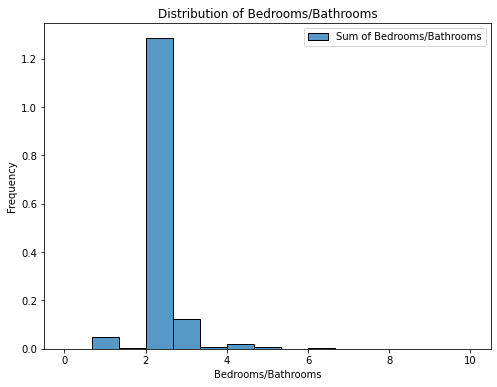

In [70]:
#We will start by visualizing the low price dataframe bedrooms and bathroom counts

plt.figure(figsize=(8,6))

sns.histplot(df_nyc_clean_low['bedrooms_and_bathrooms'], label='Sum of Bedrooms/Bathrooms', stat='density')

plt.xlabel("Bedrooms/Bathrooms")
plt.ylabel("Frequency")
plt.title("Distribution of Bedrooms/Bathrooms")
plt.legend()
plt.show()

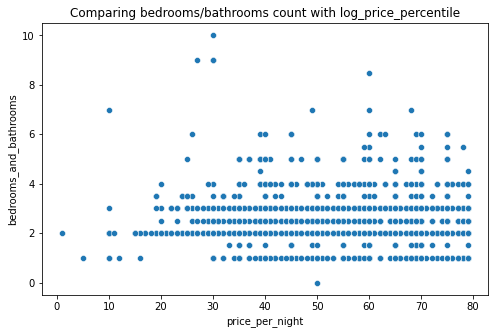

In [74]:
#We will run a scatterplot for bedrooms/bathrooms and log_price_percentile
fig, ax = plt.subplots(figsize=(8, 5))

# Use seaborn to plot two facets from dataset
sns.scatterplot(x='price_per_night', y='bedrooms_and_bathrooms', data=df_nyc_clean_low)

ax.set_title('Comparing bedrooms/bathrooms count with log_price_percentile');

Feature Engineering Ideas
- host_has_profile_pic	host_identity_verified	host_response_rate
Use the columns to create a host reliability metric

sum of bedrooms and bathrooms
for each value of bedrooms and bathrooms, do a percentile ranking on the log_price

- create a sum of bedrooms and bathrooms column, along with pricing percentile
- use the above to create a reverse index (low cost, more bedrooms and bathrooms)

-look at histogram of price or log_price, amenities

-feature engineering something with beds & baths?

pricing percentile - standardized column

-good deal, neutral deal, great deal target value
-map out the good deals, bad deals, and neutral deals across the NYC boroughs?